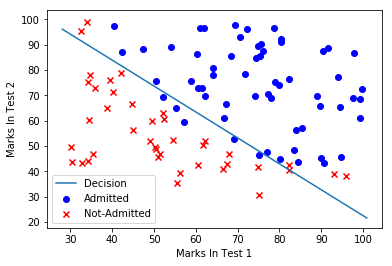

Probability of admission: 0.019615
Train Accuracy: 89.0


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import loadtxt, where, zeros, array, log, ones, mean
from pylab import scatter, show, legend, xlabel, ylabel, plot
from scipy.optimize import fmin_bfgs
import math 

def sigmoid(X):
   g=1/(1+np.exp(-X))
   return g

def costFunction(theta,X,y):
   theta.shape = (1, 3)
   m = y.size
   h = sigmoid(X.dot(theta.transpose()))
   first = ((-y).T.dot(log(h)))
   second = (1-y).T.dot(log(1-h))
   J =(first - second)/m
   return J.sum()

def gradFunction(theta,X,y):
   theta.shape = (1, 3)
   grad = zeros(3)
   h = sigmoid(X.dot(theta.transpose()))
   delta = h - y
   l = grad.size
   for i in range(l):
      sumdelta = delta.transpose().dot(X[:, i])
      grad[i] = (1.0 / m) * sumdelta * (-1)
   theta.shape = (3)
   return grad

data = loadtxt('LRD.txt', delimiter=',')
X = data[:, 0:2]
y =  data[:, 2]
pos = where(y == 1)
neg = where(y == 0)
scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
scatter(X[neg, 0], X[neg, 1], marker='x', c='r')
xlabel('Marks In Test 1')
ylabel('Marks In Test 2')
legend(['X', 'Y'])

m, n = X.shape
y.shape = (m, 1)
i = ones(shape=(m, 3))
i[:, 1:3] = X

def learning_parameters(i, y):
    def f(theta):
        return costFunction(theta, i, y)

    def fprime(theta):
        return gradFunction(theta, i, y)
    theta = zeros(3)
    return fmin_bfgs(f, theta, fprime, disp=False, maxiter=400)

learning_parameters(i, y)
theta = [-25.161272, 0.206233, 0.201470]

plot_x = array([min(i[:, 1]) - 2, max(i[:, 2]) + 2])
plot_y = (-1/theta[2]) * (theta[1] * plot_x + theta[0])

plot(plot_x, plot_y)
legend(['Decision', 'Admitted', 'Not-Admitted'])
show()

prob = sigmoid(array([1.0, 20.0, 85.0]).dot(array(theta).transpose()))
print('Probability of admission: %f' % prob)

def predict(theta,X):
   m, n = X.shape
   p = zeros(shape=(m, 1))
   h = sigmoid(X.dot(theta.transpose()))

   for i in range(0, h.shape[0]):
        if h[i] > 0.5:
            p[i, 0] = 1
        else:
            p[i, 0] = 0
   return p

p = predict(array(theta), i)
print("Train Accuracy:",((y[where(p == y)].size / float(y.size)) * 100.0))